This section involves examining the robustness of different networks in various attack or failure scenarios. The focus will be on the fraction of nodes in the largest connected component as a measure of network robustness. The networks to be explored are:

**a)** The General Relativity and Quantum Cosmology collaboration network. This will involve finding the largest connected component and creating a graph from its nodes and edges.

**b)** A random network with the same number of nodes and edges as the graph from part a.

**c)** A Small World Network generated using the connected Strogatz method, with the same number of nodes as the graphs from parts a and b, and a rewiring probability of 0.5 to obtain the number of edges closest to those in the networks from parts a and b.


In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
ggr = nx.read_edgelist("gen_qua_collab_network.txt")
print(ggr)

Graph with 5242 nodes and 14496 edges


In [3]:
list(nx.connected_components(ggr))

[{'25235',
  '5634',
  '12478',
  '1600',
  '5067',
  '15251',
  '10477',
  '8442',
  '25660',
  '7991',
  '21508',
  '4490',
  '18447',
  '4103',
  '20567',
  '20064',
  '19090',
  '17472',
  '19475',
  '20236',
  '15170',
  '14102',
  '15186',
  '14403',
  '21165',
  '8151',
  '17818',
  '11175',
  '25034',
  '10824',
  '23859',
  '1963',
  '4640',
  '12687',
  '14552',
  '15066',
  '21199',
  '25050',
  '21389',
  '7926',
  '1347',
  '19978',
  '5057',
  '5181',
  '18271',
  '7801',
  '3412',
  '16837',
  '3194',
  '3310',
  '21707',
  '12695',
  '25698',
  '25091',
  '3524',
  '15455',
  '1858',
  '23758',
  '19012',
  '21755',
  '23214',
  '18185',
  '25250',
  '7635',
  '26178',
  '25225',
  '894',
  '9241',
  '25158',
  '16545',
  '12614',
  '380',
  '24587',
  '18757',
  '17923',
  '2503',
  '22376',
  '17990',
  '21438',
  '18095',
  '24753',
  '6813',
  '13164',
  '21547',
  '11052',
  '8629',
  '18790',
  '24814',
  '9980',
  '17308',
  '25229',
  '8932',
  '1267',
  '1074',

In [18]:
ggr_lcc = max(nx.connected_components(ggr), key=len)
ggr_lcc = ggr.subgraph(ggr_lcc)

In [19]:
print(ggr_lcc)

Graph with 4158 nodes and 13428 edges


In [20]:
nx.write_edgelist(ggr_lcc, "ggr.edgelist")

In [24]:
seed = 256
num_nodes = len(ggr_lcc.nodes())
num_edges = len(ggr_lcc.edges())

gnm = nx.gnm_random_graph(num_nodes, num_edges, seed=seed)
nx.write_edgelist(gnm, "gnm.edgelist")

k = int((num_edges * 2) / num_nodes)
gws = nx.connected_watts_strogatz_graph(num_nodes, k, 0.05, seed=seed)
nx.write_edgelist(gws, "gws.edgelist")

In [42]:
ggr = nx.read_edgelist("ggr.edgelist")
print(ggr)

Graph with 4158 nodes and 13428 edges


In [43]:
gnm = nx.read_edgelist("gnm.edgelist")
print(gnm)

Graph with 4155 nodes and 13428 edges


In [44]:
gws = nx.read_edgelist("gws.edgelist")
print(gws)

Graph with 4158 nodes and 12474 edges


In [57]:
random.seed(seed)

def deletion(graph, X, Y, policy):
    results = []
    counter = 0
    while counter < Y:
        for _ in range(X):
            if policy == "Failure":
                node = random.choice(list(graph.nodes))
            elif policy == "Attack":
                node = max(graph.degree, key=lambda x: x[1])[0]
            graph.remove_node(node)
        lcc = max(nx.connected_components(graph), key=len)
        lcc_size = len(lcc)
        results.append(lcc_size / num_nodes)
        counter += 1
    return results

In [46]:
def deleteAttack(networks, X, Y, policy):
    results = {}
    for name, graph in networks.items():
        graph_copy = graph.copy()
        results[name] = deletion(graph_copy, X, Y, policy)
    return results

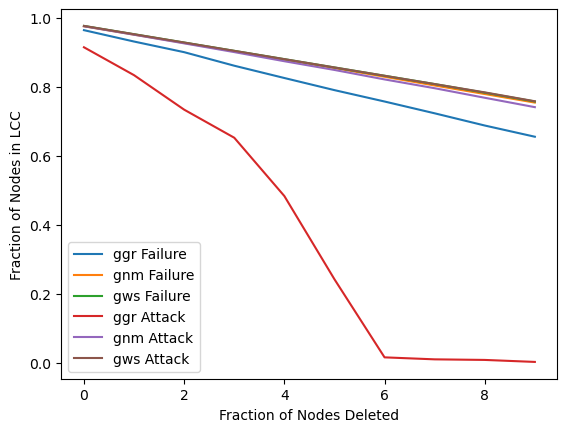

In [58]:
networks = {"ggr": ggr, "gnm": gnm, "gws": gws}
X = 100
Y = 10

failure_results = deleteAttack(networks, X, Y, "Failure")
attack_results = deleteAttack(networks, X, Y, "Attack")

for name, results in failure_results.items():
    plt.plot(range(Y), results, label=f"{name} Failure")

for name, results in attack_results.items():
    plt.plot(range(Y), results, label=f"{name} Attack")

plt.xlabel("Fraction of Nodes Deleted")
plt.ylabel("Fraction of Nodes in LCC")
plt.legend()
plt.show()

The plot displays curves representing the decrease in the size of the largest connected component (LCC) as 100 nodes are removed.

Let's interpret the results of the failure scenerios and attack scenerios seperately.

In [48]:
results

[0.9759499759499759,
 0.9518999518999519,
 0.9278499278499278,
 0.9037999037999038,
 0.8797498797498797,
 0.8556998556998557,
 0.8316498316498316,
 0.8075998075998077,
 0.7835497835497836,
 0.7578162578162578]

In [49]:
[x * X / num_nodes for x in range(Y)]

[0.0,
 0.02405002405002405,
 0.0481000481000481,
 0.07215007215007214,
 0.0962000962000962,
 0.12025012025012025,
 0.1443001443001443,
 0.16835016835016836,
 0.1924001924001924,
 0.21645021645021645]

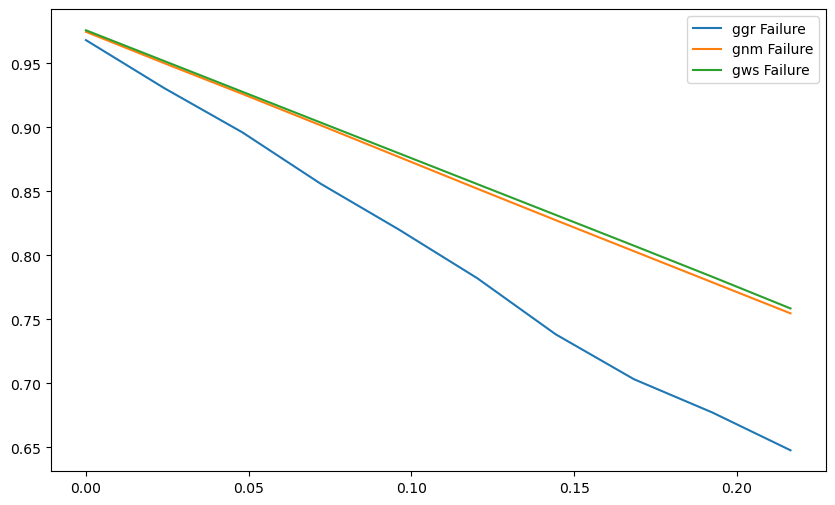

In [55]:
# Failure results
plt.figure(figsize=(10, 6))

for name, results in failure_results.items():
    plt.plot([x * X / num_nodes for x in range(Y)], results, label=f"{name} Failure")

plt.legend()
plt.show()

Failure results:

- gnm: graph steadily decreases, with a relatively slower decline rate.
- gws: graph steadily decreases, with a decline rate similqr to the gnm graph.
- ggr: graph decreases faster. Decrease starts with a slow decline in the LCC size, which gets faster as nodes are removed.

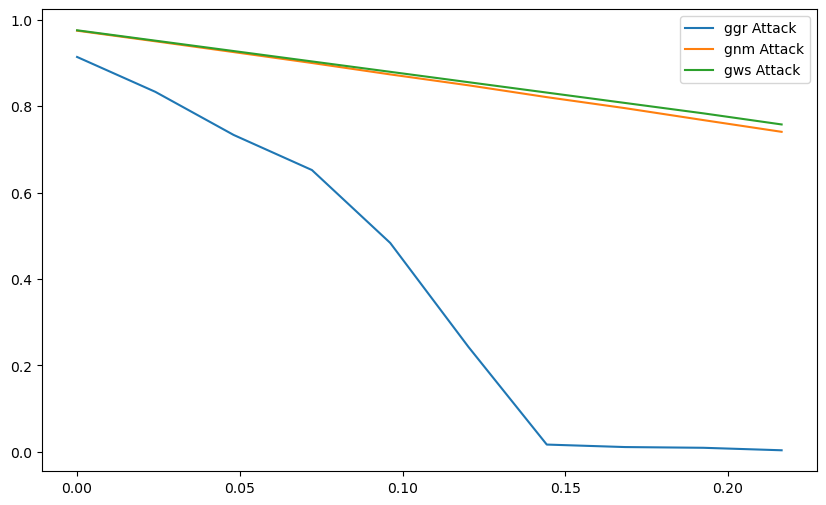

In [56]:
# Attack results

plt.figure(figsize=(10, 6))

for name, results in attack_results.items():
    plt.plot([x * X / num_nodes for x in range(Y)], results, label=f"{name} Attack")

plt.legend()
plt.show()

Attack results:

- ggr: graph decreases much faster against targeted attacks. The decrease starts with a slow decline in the LCC size, which gets much faster as nodes are removed.
- gnm: graph appears to be more resilient against targeted attacks, but it still steadily decreases.
- gws: graph appears to be resilient against targeted attacks, but the decline rate is still steadily decreasing.